## UN Data Exploration

#### Guided practice

1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository. 

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [3]:
gdp_df = pd.DataFrame(pd.read_csv('../data/gdp_per_capita.csv'))

5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df = gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [5]:
gdp_df['Country'] = gdp_df['Country'].astype('string')
gdp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   string 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 179.7 KB


- **there are 7662 rows and 3 columns in the dataframe gdp_df, excluding the index column and header rows. The 'Country' column is listed as Object rather than String which indicates more than one data type in the column. Using .astype('string') I can convert the column type to str, although this is not typically necessary in a pandas df** 

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [6]:
gdp_df['Year'].unique()
gdp_df['Year'].value_counts()


Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

- **There are 33 years represented: 1990 - 2022.**
**There are an inconsistent number of measurements taken per year, which indicates a change in the number of countries throughout the time period, or an unmeasured GDP during some years for some countries**


8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [7]:
gdp_df['Country'].value_counts()


Country
Least developed countries: UN classification    33
Austria                                         33
East Asia & Pacific (IDA & IBRD)                33
Ecuador                                         33
Egypt                                           33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: Int64

- **There are 242 uniques values in the 'Country' column. Some of these values are not countries, but areas or regions, so it does not match the listed UN member states number of 195.**
**The least represented countries are Djibouti, Somalia, and a handful of smaller island nations and countries like Kosovo which have not been high exporters due to war, famine, territorial disputes with neighboring countries, geographic isolation, or lack of resources, etc.**


9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_20121`.

In [8]:
gdp_2021 = gdp_df.loc[gdp_df['Year'] == 2021]
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
54,Africa Western and Central,2021,4014.607965
87,Albania,2021,14595.944386
120,Algeria,2021,11029.138782
...,...,...,...
7502,Viet Nam,2021,10628.219166
7535,West Bank and Gaza,2021,5641.044400
7564,World,2021,17055.357429
7597,Zambia,2021,3236.788981


10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [9]:
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

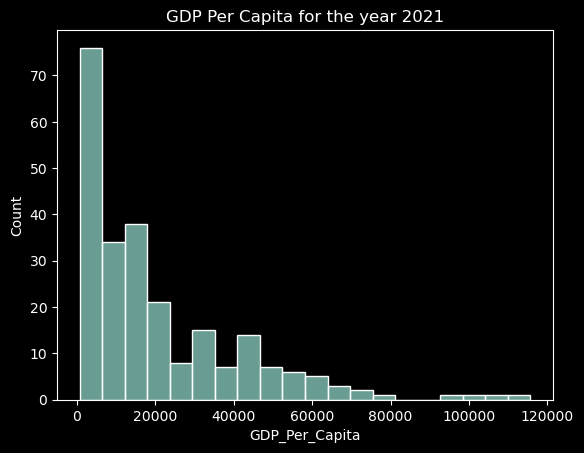

In [10]:
gdp_2021_hist = sns.histplot(gdp_2021['GDP_Per_Capita'], bins=20)
plt.title('GDP Per Capita for the year 2021');

- **This is a right skewed histogram with one mode**

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [11]:
gdp_2021_sorted = gdp_2021.sort_values('GDP_Per_Capita')
gdp_2021_sorted.head()

,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


- **The bottom five countries are Burundi, Central African Republic, DRC, Somalia, and Niger.**

In [12]:

gdp_2021_sorted.tail()

,Country,Year,GDP_Per_Capita
680,Bermuda,2021,78570.489515
5745,Qatar,2021,92862.571798
3278,Ireland,2021,102785.490239
6107,Singapore,2021,107741.118436
4147,Luxembourg,2021,115683.493708


- **The top five countries are Bermuda, Qatar, Ireland, Singapore, and Luxembourg.**

13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [13]:
gdp_df_slice = gdp_df[gdp_df['Year'].isin([1990, 2021])]
gdp_pivoted = gdp_df_slice.pivot_table(values='GDP_Per_Capita', index='Country', columns='Year')
gdp_pivoted = gdp_pivoted.dropna()
print(gdp_pivoted)

Year                                1990          2021
Country                                               
Africa Eastern and Southern  3037.297466   3519.174840
Africa Western and Central   2788.301039   4014.607965
Albania                      4827.027705  14595.944386
Algeria                      8828.874473  11029.138782
Angola                       5793.084512   5911.835657
...                                  ...           ...
Vanuatu                      2774.138350   2800.493866
Viet Nam                     2099.394649  10628.219166
World                        9705.981267  17055.357429
Zambia                       2290.039226   3236.788981
Zimbabwe                     2704.757299   2115.144555

[206 rows x 2 columns]


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [14]:
gdp_pivoted['Percent Change'] = 100*(gdp_pivoted[2021]-gdp_pivoted[1990])/gdp_pivoted[1990]
print(gdp_pivoted)

Year                                1990          2021  Percent Change
Country                                                               
Africa Eastern and Southern  3037.297466   3519.174840       15.865334
Africa Western and Central   2788.301039   4014.607965       43.980435
Albania                      4827.027705  14595.944386      202.379544
Algeria                      8828.874473  11029.138782       24.921232
Angola                       5793.084512   5911.835657        2.049878
...                                  ...           ...             ...
Vanuatu                      2774.138350   2800.493866        0.950043
Viet Nam                     2099.394649  10628.219166      406.251608
World                        9705.981267  17055.357429       75.720074
Zambia                       2290.039226   3236.788981       41.342076
Zimbabwe                     2704.757299   2115.144555      -21.799100

[206 rows x 3 columns]


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [15]:
# create boolean filter to see which countries ∆% is negative
gdp_pivoted_bools = gdp_pivoted['Percent Change'].lt(0)

# count each type of value - True = country's ∆% is negative
gdp_pivoted_bools.value_counts()


Percent Change
False    187
True      19
Name: count, dtype: int64

- **There were 19 countries with a negative percent change from 1990 to 2021**

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2022. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [16]:
# sort values by percent change in descending order so that .head() will show the largest ∆%
gdp_sorted_percent_change = gdp_pivoted.sort_values('Percent Change', ascending = False)
print(gdp_sorted_percent_change.head())

Year                                                1990          2021  \
Country                                                                  
Equatorial Guinea                             936.419751  14637.007350   
China                                        1423.896348  17657.495181   
East Asia & Pacific (excluding high income)  2191.972060  15415.447708   
East Asia & Pacific (IDA & IBRD)             2218.031627  15586.699395   
Myanmar                                       581.613311   4032.625653   

Year                                         Percent Change  
Country                                                      
Equatorial Guinea                               1463.081870  
China                                           1140.082904  
East Asia & Pacific (excluding high income)      603.268440  
East Asia & Pacific (IDA & IBRD)                 602.726652  
Myanmar                                          593.351678  


- **Equatorial Guinea had the highest percent change from 1990 to 2021 with a 1463.08% growth**

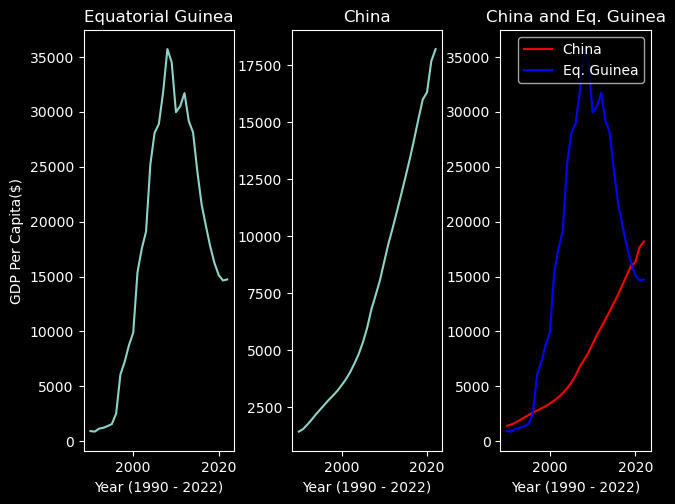

In [17]:
# extract Eq. Guinea data from df
eq_guinea = gdp_df.loc[gdp_df['Country']=='Equatorial Guinea'] 
eq_guinea_90_18 = eq_guinea[eq_guinea['Year'].isin(list(range(1990, 2023)))]

# Create plots for the two highest GDP per Capita countries: Equatorial Guinea and China
# Initialize subplots
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.tight_layout()

# Equatorial Guinea subplot
plt.subplot(131)
plt.xlabel('Year (1990 - 2022)')
plt.ylabel('GDP Per Capita($)')
plt.title('Equatorial Guinea')
plt.plot(eq_guinea_90_18['Year'], eq_guinea_90_18['GDP_Per_Capita'])

# extract China data from df
china = gdp_df.loc[gdp_df['Country']=='China'] 
china_90_18 = china[china['Year'].isin(list(range(1990, 2023)))]

# China subplot
plt.subplot(132)
plt.xlabel('Year (1990 - 2022)')
plt.title('China')
plt.plot(china_90_18['Year'], china_90_18['GDP_Per_Capita'])

# Both datasets on the same chart
plt.subplot(133)
plt.xlabel('Year (1990 - 2022)')
plt.title('China and Eq. Guinea')
plt.plot(china_90_18['Year'], china_90_18['GDP_Per_Capita'], color = 'r', label='China')
plt.plot(eq_guinea_90_18['Year'], eq_guinea_90_18['GDP_Per_Capita'], color ='b', label='Eq. Guinea')
plt.legend();


- **These line graphs show Equatorial Guinea's astronomical ascent and then rapid decline in GDP per capita, whereas China has had a near exponential increase in GDP per capita continuously increaseing throughout the time period shown on the plot. These are the top two countries in percent change GDP per capita, though the path taken to get from a similar starting point in 1990 to 2018 is very different.**

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [18]:
continents = pd.DataFrame(pd.read_csv('../data/continents.csv'))
display(continents)

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [19]:
# merging the dataframes on the 'Country' column
gdp_df = pd.merge(gdp_df, continents, on='Country', how='inner')
display(gdp_df)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5888,Zimbabwe,1994,2670.106615,Africa
5889,Zimbabwe,1993,2458.783255,Africa
5890,Zimbabwe,1992,2468.278257,Africa
5891,Zimbabwe,1991,2781.787843,Africa


19. Determine the number of countries per continent. Create a bar chart showing this.

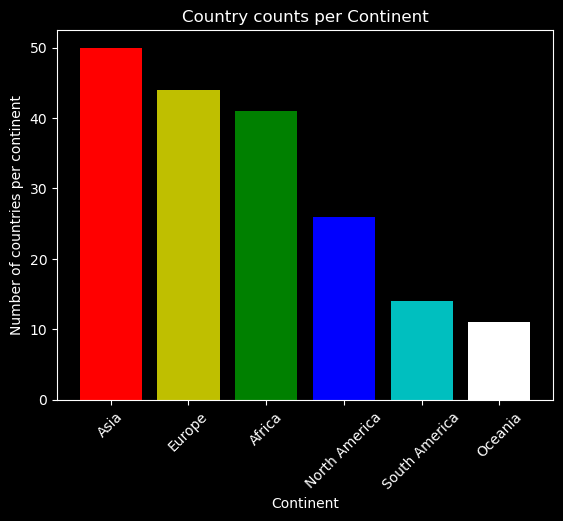

In [20]:
#drop duplicate country values
gdp_no_dups = gdp_df.drop_duplicates(subset='Country')

# get value counts for each continent
counts = gdp_no_dups['Continent'].value_counts()

# make bar chart using unique continent values as x, and counts series as y
plt.bar(gdp_no_dups['Continent'].unique(), counts, color=['r', 'y', 'g', 'b', 'c', 'w'])
plt.title('Country counts per Continent')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel('Number of countries per continent');

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

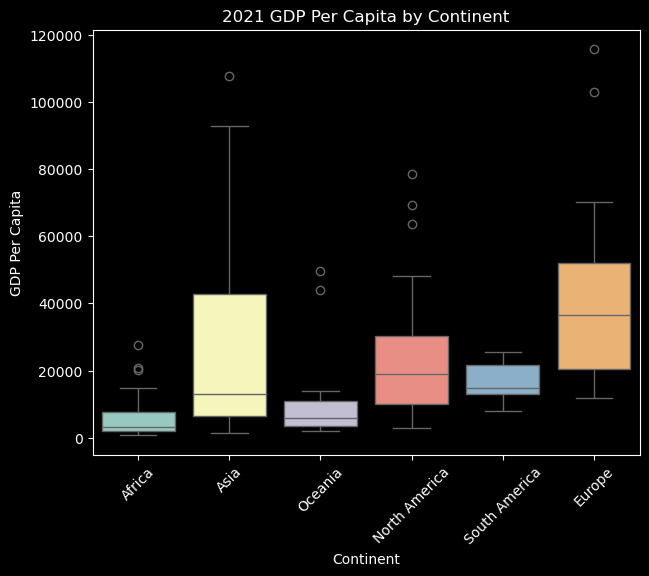

In [21]:
# slice the year 2021 out of the greater df
gdp_2021_continent = gdp_df.loc[gdp_df['Year'] == 2021].sort_values('Continent')

# select x values for boxplots: each continent 
x_vals = gdp_2021_continent['Continent'].unique()

# separate GDP data by continent
gdp_2021_asia = gdp_2021_continent[gdp_2021_continent['Continent'] == 'Asia']
gdp_2021_oceania = gdp_2021_continent[gdp_2021_continent['Continent'] == 'Oceania']
gdp_2021_northam = gdp_2021_continent[gdp_2021_continent['Continent'] == 'North America']
gdp_2021_southam = gdp_2021_continent[gdp_2021_continent['Continent'] == 'South America']
gdp_2021_europe = gdp_2021_continent[gdp_2021_continent['Continent'] == 'Europe']
gdp_2021_africa = gdp_2021_continent[gdp_2021_continent['Continent'] == 'Africa']

# create dataset for easier use with boxlots 
gdp_box_data = pd.DataFrame({'Africa':gdp_2021_africa['GDP_Per_Capita'],
                             'Asia':gdp_2021_asia['GDP_Per_Capita'],
                             'Oceania':gdp_2021_oceania['GDP_Per_Capita'],
                             'North America':gdp_2021_northam['GDP_Per_Capita'],
                             'South America':gdp_2021_southam['GDP_Per_Capita'],
                             'Europe':gdp_2021_europe['GDP_Per_Capita']})

# create boxplot 
sns.boxplot(gdp_box_data)
plt.tight_layout()
plt.xticks(rotation=45)
plt.ylabel('GDP Per Capita')
plt.xlabel('Continent')
plt.title('2021 GDP Per Capita by Continent');  # <- learned semicolon suppresses the Text() output in Jupyter


- **every continent has high gdp countries that produce well outside the upper whisker limit**
- **the IQR for Asia, North America, and Europe are much bigger, suggesting more variability in the GDP per capita on those continents**
- **Africa, Oceania, and South America have smaller IQR and range in general indicating less variability in the AGDP for those continents**

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.

In [22]:
life_expectancy = pd.read_csv('../data/Life expectancy at birth/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv', header=2)

22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [23]:
# drop listed columns
life_expectancy = life_expectancy.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

# melt data and rename listed columns
life_expectancy = life_expectancy.melt(id_vars='Country Name', var_name='Year', value_name='Life Expectancy')
life_expectancy = life_expectancy.rename(columns={'Country Name':'Country'})
life_expectancy = life_expectancy.sort_values(['Country', 'Year'])
display(life_expectancy)

,Country,Year,Life Expectancy
2,Afghanistan,1960,32.535
268,Afghanistan,1961,33.068
534,Afghanistan,1962,33.547
800,Afghanistan,1963,34.016
1066,Afghanistan,1964,34.494
...,...,...,...
16225,Zimbabwe,2020,61.124
16491,Zimbabwe,2021,59.253
16757,Zimbabwe,2022,59.391
17023,Zimbabwe,2023,NaN


23. What was the first country with a life expectancy to exceed 80?

In [24]:
life_expectancy = life_expectancy.sort_values(['Year'])
country_life_exp_80 = life_expectancy.loc[life_expectancy['Life Expectancy'] >= 80]
display(country_life_exp_80.iloc[0])

Country                Japan
Year                    1996
Life Expectancy    80.219756
Name: 9695, dtype: object

- **The first country to have a life expectancy >= 80 was Japan in 1996.**

24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [25]:
# Clean up dfs for merge
life_expectancy = life_expectancy.dropna()
life_expectancy['Year'] = pd.to_numeric(life_expectancy['Year'])

# merge the dfs on the two columns, keeping only values in both dfs. 
gdp_le = pd.merge(gdp_df, life_expectancy, on=['Country', 'Year'], how='inner')
display(gdp_le.head(), gdp_le.tail())



,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091
5503,Zimbabwe,1990,2704.757299,Africa,59.426


25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?

In [26]:
# Slice the year 2021
gdp_le_2021 = gdp_le[gdp_le['Year'].isin([2021])]

# slice life expectancy > 80
display(gdp_le_2021.loc[gdp_le_2021['Life Expectancy'] >= 80].count())

Country            31
Year               31
GDP_Per_Capita     31
Continent          31
Life Expectancy    31
dtype: int64

2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).

- **31 countries have a life expectancy of at least 80 in 2021**

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
2857,Luxembourg,2021,115683.493708,Europe,82.597561
4364,Singapore,2021,107741.118436,Asia,83.092683
2285,Ireland,2021,102785.490239,Europe,82.353659


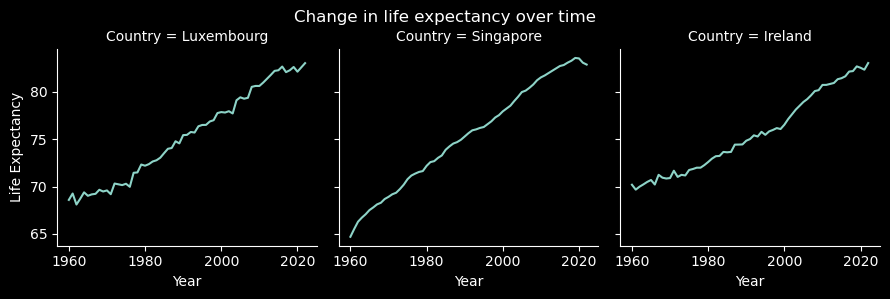

In [50]:
# find the countries with the 3 largest GDP per capita
display(gdp_le_2021.nlargest(3, 'GDP_Per_Capita'))

# create seaborn facet grid for the ∆LE over time for Luxembourg, Singapore, and Ireland
lux_sing_ire_df = life_expectancy[life_expectancy['Country'].isin(['Luxembourg', 'Singapore', 'Ireland'])].set_index('Year')
grid = sns.FacetGrid(lux_sing_ire_df, col='Country')
grid.map_dataframe(sns.lineplot, x='Year', y='Life Expectancy')
plt.subplots_adjust(top=0.85)
plt.suptitle('Change in life expectancy over time');

- **the countries with the 3 largest GDP per capita in 2021 were Luxembourg, Singapore, and Ireland**

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

Text(0, 0.5, 'Life Expectancy (yrs)')

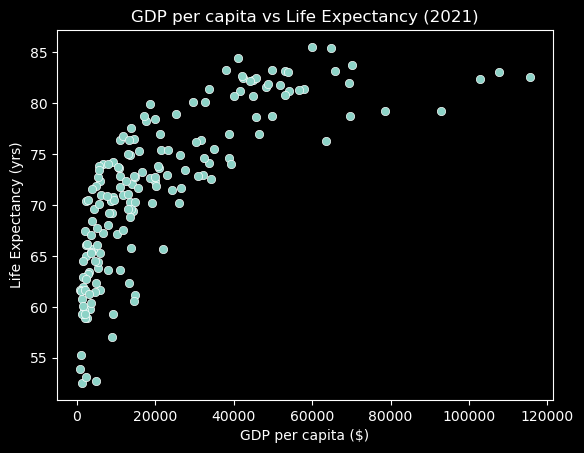

In [55]:
gdp_vs_le = sns.scatterplot(gdp_le_2021, x='GDP_Per_Capita', y='Life Expectancy')
plt.title('GDP per capita vs Life Expectancy (2021)')
plt.xlabel('GDP per capita ($)')
plt.ylabel('Life Expectancy (yrs)')

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [61]:
print('correlation = ' + str(gdp_le_2021['GDP_Per_Capita'].corr(gdp_le_2021['Life Expectancy'])))

correlation = 0.7450812403297985


- **Correlation (R) is a value between -1 and 1 which indicates the strength and type of association between two variables. A correlation of 0.745... indicates a moderately strong positive association between GDP per capita and life expectancy, meaning it is highly likely that to some extent, as one of those variables increases, so will the other.**

29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

correlation = 0.8465749797261861


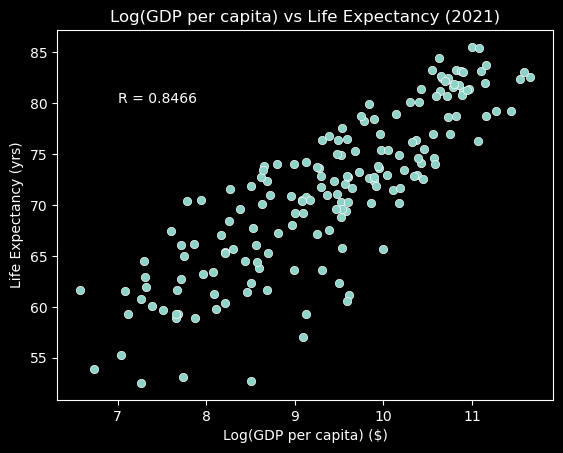

In [92]:
# Add column: Log(GDP per Capita)
gdp_le_2021 = pd.DataFrame(gdp_le_2021)
gdp_le_2021['Log(GDP/Cap)'] = np.log(gdp_le_2021['GDP_Per_Capita'])
R = gdp_le_2021['Log(GDP/Cap)'].corr(gdp_le_2021['Life Expectancy'])
print('correlation = ' + str(R));

log_gdp_vs_le = sns.scatterplot(gdp_le_2021, x='Log(GDP/Cap)', y='Life Expectancy');
plt.title('Log(GDP per capita) vs Life Expectancy (2021)')
plt.xlabel('Log(GDP per capita) ($)')
plt.ylabel('Life Expectancy (yrs)')
plt.text(7,80, 'R = ' + str(round(R,4)));

- **This correlation of 0.847 is even stronger than the previous correlation, meaning there is an even higher association between the log(gdp per capita) and life expectancy than just gdp per capita and L.E.
The scatter plot shows a more linear trend that is positively associated and fairly strong. 

### Bonus: Solo Exploration:

1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 

2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).